In [24]:
import numpy as np
import pyswarms as ps

c1 = 100
c2 = 100
x1_f = 0.0
x2_f = 0.0
tf = 2.0
N = 50
dt = tf/N

x0 = np.array([1.0, 1.0])

# def state_equations(u):
#     M, N = u.shape
#     X = np.zeros((M, N, 2))
#     X[:, 0, :] = x0
#     for i in range(1, N):
#         X[:, i, 0] = X[:, i-1, 0] + dt * X[:, i-1, 1]
#         X[:, i, 1] = X[:, i-1, 1] + dt * u[:, i-1]
#     return X

# def cost_function(u):
#     X = state_equations(u)
#     x1_coeff = c1 * (X[:, -1, 0] - x1_f)**2
#     x2_coeff = c2 * (X[:, -1, 1] - x2_f)**2
#     integral = 0.5 * np.sum(u**2, axis=1) * dt
#     return x1_coeff + x2_coeff + integral

# Define bounds for u
bounds = (-4 * np.ones(N), 3 * np.ones(N))

# Initialize the optimizer
options_local = {'c1': 0.5, 'c2': 0.5, 'w': 0.8, 'k': 3, 'p': 1}
options_global = {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
optimizer = ps.single.LocalBestPSO(n_particles=20, dimensions=N, options=options_local, bounds=bounds)

# Perform optimization
best_cost, best_u = optimizer.optimize(cost_function, iters=1000)

# Print the optimal control
print("Optimal control u(t):", best_u)
    

2024-07-15 22:34:35,183 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8, 'k': 3, 'p': 1}
pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=80 
2024-07-15 22:34:35,632 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 79.95353780505518, best pos: [-1.64247518 -3.08363838  0.65883819 -1.88586436 -2.62653181 -1.0306621
 -2.89290069 -3.67615005 -2.67818142 -0.03345862 -1.9108042  -1.79609903
 -2.79693845 -0.70171491 -1.67961602 -0.95531383 -0.61649205 -2.33842561
  1.38842744 -0.86070505  1.37777753 -3.25447516  0.07820871 -2.2846861
  0.2962297  -0.6552933  -0.93950434 -2.11861439 -1.39403105  0.71154989
 -0.45528948  0.76431731 -0.92787404 -0.27911097  1.1802247  -0.24756163
  0.88892413 -0.93665516 -2.09273842 -0.55703683  2.88491005  0.44952306
  1.472778   -0.98473542  1.86302546 -2.92873894 -0.91724631  1.51250727
 -0.80829207  0.42365809]


Optimal control u(t): [-1.64247518 -3.08363838  0.65883819 -1.88586436 -2.62653181 -1.0306621
 -2.89290069 -3.67615005 -2.67818142 -0.03345862 -1.9108042  -1.79609903
 -2.79693845 -0.70171491 -1.67961602 -0.95531383 -0.61649205 -2.33842561
  1.38842744 -0.86070505  1.37777753 -3.25447516  0.07820871 -2.2846861
  0.2962297  -0.6552933  -0.93950434 -2.11861439 -1.39403105  0.71154989
 -0.45528948  0.76431731 -0.92787404 -0.27911097  1.1802247  -0.24756163
  0.88892413 -0.93665516 -2.09273842 -0.55703683  2.88491005  0.44952306
  1.472778   -0.98473542  1.86302546 -2.92873894 -0.91724631  1.51250727
 -0.80829207  0.42365809]


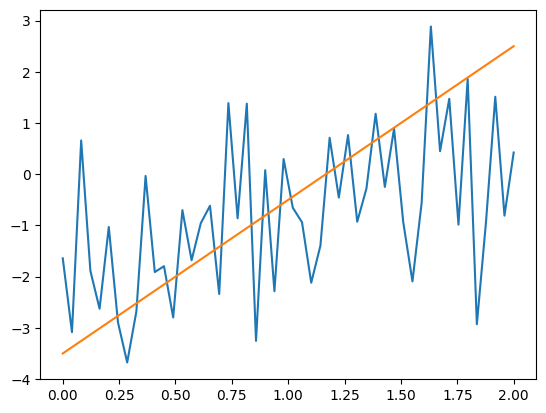

In [25]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 2, N), best_u)
plt.plot(np.linspace(0, 2, N), 3 * np.linspace(0, 2, N) - 3.5)

In [26]:
def generate_unique_numbers(n, k, init):
    arr = [init]
    while len(arr) < k + 1:
        num = np.random.randint(0, n)
        if num not in arr:
            arr.append(num)
    return np.array(arr)

In [27]:
ind = generate_unique_numbers(20, 3, 2)
x = np.random.rand(20)

In [28]:
print(x)
print(ind)
print(x[ind])

[0.15675451 0.43431239 0.88094611 0.45798146 0.24982772 0.75796075
 0.9563812  0.31381254 0.57080128 0.15859724 0.84526081 0.15374795
 0.702655   0.31036754 0.3075702  0.28225447 0.30082622 0.73816765
 0.58981706 0.83053483]
[2 6 1 4]
[0.88094611 0.9563812  0.43431239 0.24982772]


In [99]:
def state_equations(u, x0, dt):
    N, = u.shape
    X = np.zeros((N, 2))
    X[0, :] = [1, 1]
    for i in range(1, N):
        X[i, 0] = X[i-1, 0] + dt * X[i-1, 1]
        X[i, 1] = X[i-1, 1] + dt * u[i-1]
    # t = np.linspace(0.0, 2.0, 10000, dtype=np.float64)
    # X[:, 0] = 0.5 * t ** 3 - 1.75 * t ** 2 + t + 1
    # X[:, 1] = 1.5 * t ** 2 - 3.5 * t + 1
    return X

def cost_function(u, x0, dt):
    c1 = 50
    c2 = 50
    X = state_equations(u, x0, dt)
    x1_coeff = c1 * (X[-1, 0] - 0)**2
    x2_coeff = c2 * (X[-1, 1] - 0)**2
    integral = 0.5 * np.sum(u**2) * dt
    return x1_coeff + x2_coeff + integral
t = np.linspace(0.0, 2.0, 20, dtype=np.float64)
u = 3 * t - 3.5
print(u)
print(cost_function(u, [0, 0], t[1] - t[0]))

[-3.5        -3.18421053 -2.86842105 -2.55263158 -2.23684211 -1.92105263
 -1.60526316 -1.28947368 -0.97368421 -0.65789474 -0.34210526 -0.02631579
  0.28947368  0.60526316  0.92105263  1.23684211  1.55263158  1.86842105
  2.18421053  2.5       ]
11.643595429746542


In [100]:

def LocalBestSwarm(N, n, MINNF, vmax, C1min, C1max, C2min, C2max, C3min, C3max, Wmin, Wmax, Xmin, Xmax, Vmax, T, delta_s_max, cost_function, x0, dt):
    X = np.zeros((N, n))
    P_best = np.zeros((N, n))
    BEST = np.zeros(N)
    fitness = np.zeros(N)
    V = np.zeros((N, n))
    # t = np.linspace(0.0, 2.0, 100, dtype=np.float64)
    for i in range(N):
        for d in range(n):
            X[i, d] = Xmin + np.random.rand() * (Xmax - Xmin)
            V[i, d] = -Vmax + np.random.rand() * (2 * Vmax)
        # if (i % 1 == 0):
        #     X[i] = 3 * t - 3.5
        #     print(X[i])
        #     print(fitness[i])
        P_best[i] = X[i]
        fitness[i] = cost_function(X[i], x0, t[1] - t[0])
        BEST[i] = fitness[i]
    i_0 = np.argmin(fitness)
    G_best = np.min(fitness)
    P_gbest = X[i_0]
    found = False
    s = 1
    NF = np.zeros(N)
    while (s <= T and not found):

        C_1 = C1min + (C1max - C1min) * s / T
        C_2 = C2min + (C2max - C2min) * s / T
        C_3 = C3min + (C3max - C3min) * s / T
        W = Wmax - (Wmax - Wmin) * s / T
        for i in range(N):

            social_neighbourhood = generate_unique_numbers(N, 3, i)
            P_lbest = P_best[social_neighbourhood[np.argmin(BEST[social_neighbourhood])]]

            for d in range(n):
                R1 = np.random.rand()
                R2 = np.random.rand()
                R3 = np.random.rand()
                V[i, d] = W * V[i, d] + C_1 * R1 * (P_best[i, d] - X[i, d]) + C_2 * R2 * (P_lbest[d] - X[i, d]) + C_3 * R3 * (P_gbest[d] - X[i, d])

                # velocity control
                if V[i, d] > vmax:
                    V[i, d] = vmax
                if V[i, d] < -vmax:
                    V[i, d] = -vmax
                X[i, d] = X[i, d] + V[i, d]

                # position control
                if X[i, d] > Xmax:
                    tau = X[i, d] - Xmax
                    X[i, d] = Xmax - tau
                    V[i, d] = -(V[i, d] - tau)
                if X[i, d] < Xmin:
                    tau = Xmin - X[i, d]
                    X[i, d] = Xmax + tau
                    V[i, d] = -(V[i, d] - tau)
                
            # step control
            for d in range(n - 1):
                delta_gt_mx = X[:, d + 1] - X[:, d] > delta_s_max
                X[delta_gt_mx, d+1] = X[delta_gt_mx, d] + delta_s_max
                delta_lt_mn = X[:, d + 1] - X[:, d] < -delta_s_max
                X[delta_lt_mn, d+1] = X[delta_lt_mn, d] - delta_s_max
            
            fitness[i] = cost_function(X[i], x0, 2.0/n)

            if fitness[i] < BEST[i]:
                P_best[i] = X[i]
                BEST[i] = fitness[i]
            else:
                NF[i] = NF[i] + 1
            
            if fitness[i] < G_best:
                G_best = fitness[i]
                P_gbest = X[i]
            
        if np.all(NF >= MINNF):
            found = True
        
        s = s + 1

    return G_best, P_gbest, BEST

                    
                


In [130]:
best, best_u, best = LocalBestSwarm(N=20, n=50, MINNF=100, vmax=5, C1min=0.5, C1max=2, C2min=1, C2max=1.5, C3min=0.5, C3max=1.5, Wmin=0.2, Wmax=0.5, Xmin=-4, Xmax=3, Vmax=5, T=500, delta_s_max=0.15, cost_function=cost_function, x0=x0, dt=dt)

In [131]:
print(best)

[3.43214901 3.43214664 3.43214908 3.43214569 3.43214257 3.43214931
 3.43214319 3.43214751 3.43214381 3.43214179 3.43214399 3.4321442
 3.43214529 3.43214497 3.43214709 3.43214729 3.43214969 3.43214537
 3.43214587 3.43214675]


In [132]:
print(best_u)

[-3.52149604 -3.39569497 -3.25686043 -3.16736477 -3.02043683 -3.00047725
 -2.85234637 -2.70236958 -2.55238192 -2.42724503 -2.30648493 -2.15679556
 -2.0069974  -1.86748867 -1.79416793 -1.64449691 -1.49528973 -1.37327387
 -1.27603659 -1.12687099 -0.9781576  -0.86717926 -0.72846804 -0.60238195
 -0.48509515 -0.37175655 -0.22970936 -0.09200704  0.02023664  0.16651112
  0.3149265   0.40075761  0.52988961  0.65815782  0.78068565  0.91529492
  1.03758967  1.16526911  1.29757978  1.4254344   1.5495665   1.69700517
  1.79652837  1.92183454  2.05650138  2.16252922  2.07091583  1.92091583
  1.77091583  1.62091583]


[[ 1.          1.        ]
 [ 1.04        0.85914016]
 [ 1.07436561  0.72331236]
 [ 1.1032981   0.59303794]
 [ 1.12701962  0.46634335]
 [ 1.14567335  0.34552588]
 [ 1.15949439  0.22550679]
 [ 1.16851466  0.11141293]
 [ 1.17297118  0.00331815]
 [ 1.1731039  -0.09877713]
 [ 1.16915282 -0.19586693]
 [ 1.16131814 -0.28812632]
 [ 1.14979309 -0.37439815]
 [ 1.13481716 -0.45467804]
 [ 1.11663004 -0.52937759]
 [ 1.09545494 -0.60114431]
 [ 1.07140916 -0.66692418]
 [ 1.0447322  -0.72673577]
 [ 1.01566277 -0.78166673]
 [ 0.9843961  -0.83270819]
 [ 0.95108777 -0.87778303]
 [ 0.91597645 -0.91690933]
 [ 0.87930007 -0.9515965 ]
 [ 0.84123621 -0.98073523]
 [ 0.80200681 -1.0048305 ]
 [ 0.76181359 -1.02423431]
 [ 0.72084421 -1.03910457]
 [ 0.67928003 -1.04829295]
 [ 0.63734831 -1.05197323]
 [ 0.59526938 -1.05116376]
 [ 0.55322283 -1.04450332]
 [ 0.5114427  -1.03190626]
 [ 0.47016645 -1.01587595]
 [ 0.42953141 -0.99468037]
 [ 0.3897442  -0.96835406]
 [ 0.35101003 -0.93712663]
 [ 0.31352497 -0.90051483]
 

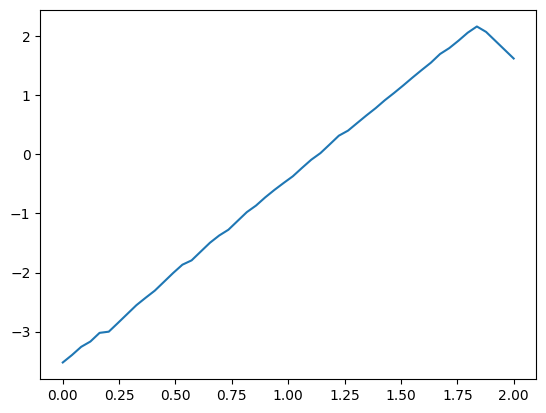

In [133]:

plt.plot(np.linspace(0, 2, 50), best_u)
print(state_equations(best_u, x0, 2.0/50))
print(best)

In [ ]:
u = np.arange(0, 1)